In [2]:
import numpy as np
import pandas as pd
import Strategies 
import Strategy_Analysis_Tool as SAT
from binance.client import Client
from matplotlib import pyplot as plt

In [3]:
symbol = "BTCUSDT"
coin = "BTC"
timeFrame = "1m"
startDate = "2022-07-21"
endDate = "2022-07-22"
client = Client()
bars = client.get_historical_klines(symbol=f'{coin}USDT',interval=timeFrame,start_str=startDate, end_str = endDate)
test_df = pd.DataFrame(bars[:],columns=["timestamp","open","high","low","close","volume", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"])
test_df["date"]=pd.to_datetime(test_df["timestamp"],unit="ms").astype(str)
test_df = test_df.drop(["timestamp", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"], axis=1)
test_df["open"] = pd.to_numeric(test_df["open"])
test_df["high"] = pd.to_numeric(test_df["high"])
test_df["low"] = pd.to_numeric(test_df["low"])
test_df["close"] = pd.to_numeric(test_df["close"])
test_df["volume"] = pd.to_numeric(test_df["volume"])
test_df

,open,high,low,close,volume,date
0,23223.30,23241.80,23200.00,23232.33,180.74421,2022-07-21 00:00:00
1,23232.33,23261.82,23227.56,23236.17,110.18477,2022-07-21 00:01:00
2,23236.17,23280.21,23233.38,23261.54,172.32926,2022-07-21 00:02:00
3,23259.78,23286.57,23218.01,23271.81,138.26680,2022-07-21 00:03:00
4,23271.81,23313.21,23268.86,23295.74,208.49995,2022-07-21 00:04:00
...,...,...,...,...,...,...
1436,23172.45,23196.55,23164.88,23194.21,44.79838,2022-07-21 23:56:00
1437,23195.78,23196.27,23139.19,23148.07,76.89571,2022-07-21 23:57:00
1438,23151.54,23152.29,23133.03,23134.86,62.04912,2022-07-21 23:58:00
1439,23136.72,23161.46,23133.46,23152.19,44.86196,2022-07-21 23:59:00


In [4]:
parameters = {
    "name":"grid",                                    ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "buy_unit" : 0.0001,                              ## float
    "grid_number" : 50,                               ## int  
    "equal_Diff_or_Ratio" : "DIFF",                   ## "DIFF", "RATIO"
    "trading_logistic":"long",                       ## "long", "short", "both"
    "initial_setup":{"type":"None", "protion":0.0},   ## "type": "long", "short" | "None". "portion" : float
    "lowest_price" : 18000.0,                          ## float
    "highest_price" : 24000.0                         ## float
}

myGrid = Strategies.Grid(parameters)
# buy_and_hodl = Strategies.Buy_and_Hold(parameters)

trading count 41 profit 0.0007252709999987701


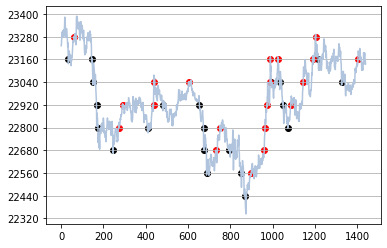

-507.2113640676299

In [5]:
profit, trading_count, buy_record, sell_record = myGrid.back_test(test_df)
print("trading count", trading_count, "profit", profit)
SAT.Analysis_tool.draw_backtest(myGrid, test_df, profit, trading_count, buy_record, sell_record)
SAT.Analysis_tool.Shape_Ratio(myGrid, test_df, 0.02, window_size=100, window_off=100)